<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/feedforward_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

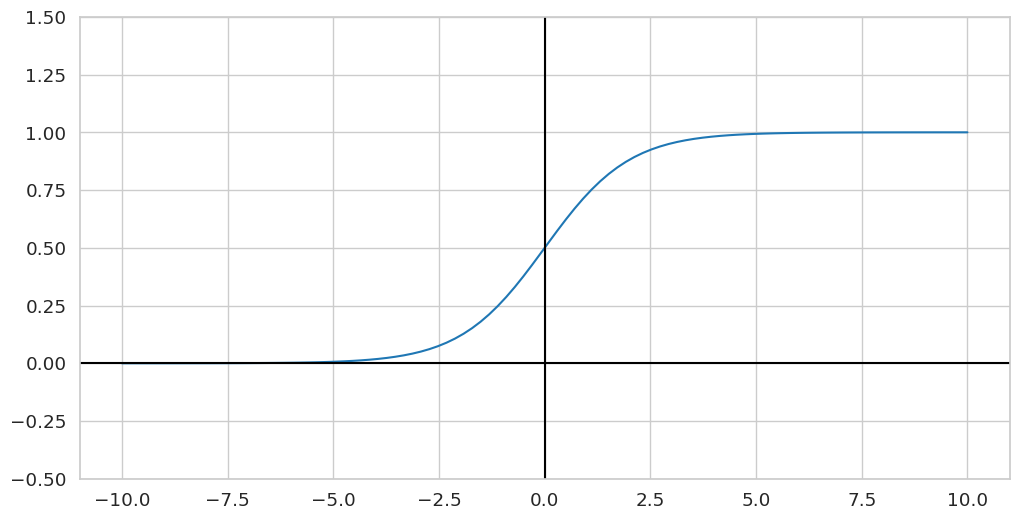

In [52]:
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

In [53]:
def logic_gate(w1, w2, b):
   return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test(gate):
  for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [54]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


In [55]:
and_gate = logic_gate(15,15, -20)

test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


In [61]:
nor_gate = logic_gate(-20, -20, 10)
test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


In [60]:
nand_gate = logic_gate(-15, -15, 20)
test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


In [62]:
def xor_gate(a, b):
    c = np.round(or_gate(a, b))
    d = np.round(nand_gate(a, b))
    return and_gate(c, d)
test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


In [10]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])

In [11]:
x_in = np.array([.5,.8,.2])
x_in

array([0.5, 0.8, 0.2])

In [12]:
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],[.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])
x_mat_in

array([[0.5, 0.8, 0.2],
       [0.1, 0.9, 0.6],
       [0.2, 0.2, 0.3],
       [0.6, 0.1, 0.9],
       [0.5, 0.5, 0.4],
       [0.9, 0.1, 0.9],
       [0.1, 0.8, 0.7]])

In [13]:
def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

In [14]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#x_in single inputs
z1 = np.dot(x_in, W_1)
a1 = sigmoid(z1)

z2 = np.dot(a1, W_2)
a2 = sigmoid(z2)

z3 = np.dot(a2, W_3)
a3 = soft_max_vec(z3)

print("Layer 1 output:", a1)
print("Layer 2 output:", a2)
print("Final output (softmax):", a3)

Layer 1 output: [0.68997448 0.66818777 0.10909682 0.97811873]
Layer 2 output: [0.97231549 0.98225163 0.61882199 0.17506576]
Final output (softmax): [0.72780576 0.26927918 0.00291506]
